## Общая информация

**Срок сдачи:** 5 апреля 2022, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Кузнецова Мария.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [116]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score

from scipy.spatial.distance import cdist
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [162]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        if self.algorithm == 'brute':
            dist = cdist(X, self.X_train, self.metric)
            ind = dist.argsort(axis=1)[...,:self.n_neighbors]

        if self.algorithm == 'kd_tree':
            tree = KDTree(self.X_train)
            ind = tree.query(X, k=self.n_neighbors, return_distance=False)
        
        count_class = np.unique(self.y_train).shape[0]
        y = np.repeat(self.y_train[np.newaxis,...], X.shape[0], axis=0)
        y_n = np.take_along_axis(y, ind, axis = 1)
        pred = np.apply_along_axis(np.bincount, axis=1, arr=y_n, minlength=count_class).argmax(axis=1)
        return pred
        
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [163]:
iris = datasets.load_iris()

In [164]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [165]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [166]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [167]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
print(abs( accuracy_score(y_test, my_clf_pred)))
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

0.9333333333333333


### Задание 2 (0.5 балла)

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [41]:
%time clf.fit(X_train, y_train)

Wall time: 999 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [42]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [43]:
%time clf.predict(X_test)

Wall time: 4 ms


array([0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2])

In [44]:
%time my_clf.predict(X_test)

Wall time: 999 µs


array([0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2], dtype=int64)

### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [45]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [46]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [47]:
%time clf.fit(X_train, y_train)

Wall time: 11 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [48]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [49]:
%time clf.predict(X_test)

Wall time: 3 ms


array([1, 0, 1, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1])

In [50]:
%time my_clf.predict(X_test)

Wall time: 2 ms


array([1, 0, 1, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1], dtype=int64)

In [51]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred) )<0.005, "Score must be simillar"

### Задание 4 (2.5 балла)

Рассмотрим новый датасет 20 newsgroups

In [125]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [126]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [127]:
vectorizer = CountVectorizer(max_df = 0.05, min_df = 0.005)
vectors_data = vectorizer.fit_transform(data)

In [128]:
data_1 = vectors_data.toarray()

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [68]:
kfold = KFold(n_splits = 3, shuffle = True)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [87]:
def best_count_neighbors(X, y, list_neighbors, algorithm='brute', metric='euclidean'):
    res = np.zeros(len(list_neighbors))
    
    for ind_train, ind_test in kfold.split(X, y):
        j = 0
        X_train, X_test, y_train, y_test = X[ind_train], X[ind_test], y[ind_train], y[ind_test]
        for i in list_neighbors:
            my_clf = MyKNeighborsClassifier(n_neighbors = i, algorithm = algorithm, metric = metric)
            my_clf.fit(X_train, y_train)
            my_clf_pred = my_clf.predict(X_test)
            res[j] += abs(accuracy_score(y_test, my_clf_pred))
            j += 1
    res = res / 3
    return list_neighbors[res.argmax()], res

In [88]:
best_neighbors_e, accuracy_e = best_count_neighbors(data_1, target, range(1, 11), algorithm='brute', metric='euclidean')

In [90]:
best_neighbors_c, accuracy_c = best_count_neighbors(data_1, target, range(1, 11), algorithm='brute', metric='cosine')

In [155]:
tfidfVect = TfidfVectorizer(max_df = 0.05, min_df = 0.005)
vectors_data = tfidfVect.fit_transform(data)
data_2 = vectors_data.toarray()

In [97]:
best_neighbors_e_tf, accuracy_e_tf = best_count_neighbors(data_2, target, range(1, 11), algorithm='brute', metric='euclidean')

In [104]:
best_neighbors_c_tf, accuracy_c_tf = best_count_neighbors(data_2, target, range(1, 11), algorithm='brute', metric='cosine')

In [106]:
print('При векторизации CountVectorizer и при исспользовании евклидовой метрики ')
print('Точность предсказания:', accuracy_e)
print('Лучшее количество соседей =', best_neighbors_e, end='\n\n')

print('При векторизации CountVectorizer и при исспользовании косинусовой метрики ')
print('Точность предсказания:', accuracy_c)
print('Лучшее количество соседей =', best_neighbors_c, end='\n\n')

print('При векторизации TfidfVectorizer и при исспользовании евклидовой метрики ')
print('Точность предсказания: ', accuracy_e_tf)
print('Лучшее количество соседей =', best_neighbors_e_tf, end='\n\n')

print('При векторизации TfidfVectorizer и при исспользовании косинусовой метрики ')
print('Точность предсказания:', accuracy_c_tf)
print('Лучшее количество соседей =', best_neighbors_c_tf, end='\n\n')

При векторизации CountVectorizer и при исспользовании евклидовой метрики 
Точность предсказания: [0.28310037 0.26144544 0.25472807 0.2564959  0.26171113 0.26197601
 0.26118091 0.25967845 0.25782209 0.25764537]
Лучшее количество соседей = 1

При векторизации CountVectorizer и при исспользовании косинусовой метрики 
Точность предсказания: [0.44007518 0.41232184 0.43265045 0.4551884  0.47357227 0.48046655
 0.48497433 0.49213409 0.49593487 0.50044263]
Лучшее количество соседей = 10

При векторизации TfidfVectorizer и при исспользовании евклидовой метрики 
Точность предсказания:  [0.18658261 0.15034487 0.1346121  0.12939695 0.12692234 0.1233871
 0.12002856 0.11684675 0.11198556 0.10853836]
Лучшее количество соседей = 1

При векторизации TfidfVectorizer и при исспользовании косинусовой метрики 
Точность предсказания: [0.45801628 0.43167757 0.45448088 0.47887621 0.49832103 0.50512656
 0.51467226 0.51723524 0.52315721 0.52563212]
Лучшее количество соседей = 10



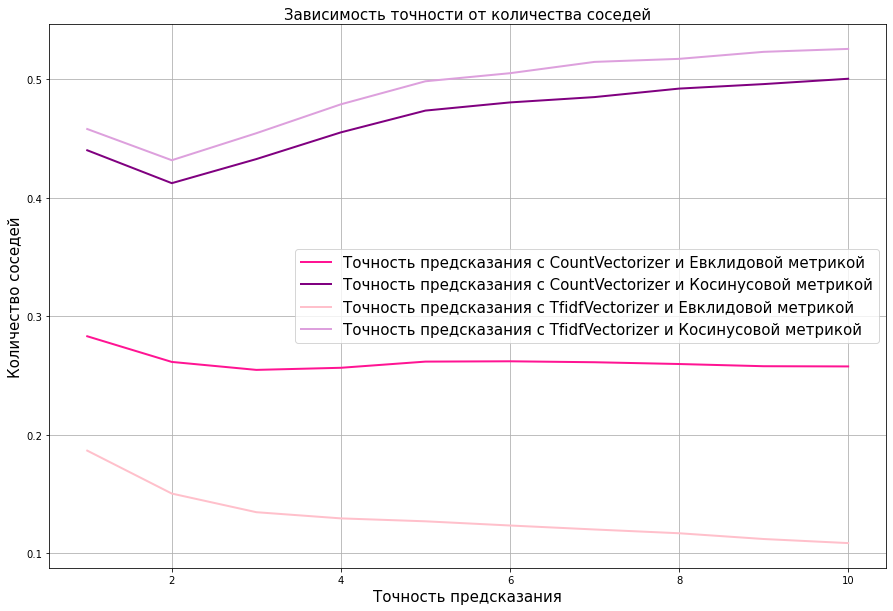

In [118]:
fig = plt.figure(figsize = (15, 10))
plt.title('Зависимость точности от количества соседей', fontsize=15)
plt.xlabel('Точность предсказания', fontsize=15)
plt.ylabel('Количество соседей', fontsize=15)
plt.plot(range(1, 11), accuracy_e, label = "Точность предсказания c CountVectorizer и Евклидовой метрикой", color='deeppink', linewidth=2)
plt.plot(range(1, 11), accuracy_c, label = "Точность предсказания c CountVectorizer и Косинусовой метрикой", color='purple', linewidth=2)
plt.plot(range(1, 11), accuracy_e_tf, label = "Точность предсказания c TfidfVectorizer и Евклидовой метрикой", color='pink', linewidth=2)
plt.plot(range(1, 11), accuracy_c_tf, label = "Точность предсказания c TfidfVectorizer и Косинусовой метрикой", color='plum', linewidth=2)
plt.legend(fontsize = 15)
plt.grid(True)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

*Лучше всего себя показала модель с TfIdf векторизацией и косинусовой метрикой*

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [130]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [135]:
data_test = newsgroups['data']
target_test = newsgroups['target']

In [160]:
test = tfidfVect.transform(data_test)
test = test.toarray()

In [161]:
my_clf = MyKNeighborsClassifier(n_neighbors = 10, algorithm = 'brute', metric = 'cosine')
my_clf.fit(data_2, target)
my_clf_pred = my_clf.predict(test)
abs(accuracy_score(target_test, my_clf_pred))

0.467206585236325

*0.467 ниже чем на кросс-валидации, но это вполне объяснимо тем, что данные на тестовой выборке могут существенно отличаться от данных на тренировочной, и все наши подобранные параметры были именно для тренировочной выборки.*

Этот интересный опыт с текстами подтвердил уже слышанное ранее утверждение о том, что при работе с текстами лучше использовать косинусого расстояние